In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx

In [71]:
# create adjacency matrix for network A
index_i_A, index_j_A = np.loadtxt("net1.txt", dtype=np.int16, unpack=True)
dim = max(index_i_A.max(), index_j_A.max())+1
NetA_matrix = np.zeros((dim, dim))
for i,j in zip(index_i_A, index_j_A):
    # the adjacency matrix needs to be symmetric
    NetA_matrix[i, j] = 1
    NetA_matrix[j, i] = 1

In [72]:
# create adjacency matrix for network B
index_i_B, index_j_B = np.loadtxt("net2.txt", dtype=np.int16, unpack=True)
dim = max(index_i_B.max(), index_j_B.max())+1
NetB_matrix = np.zeros((dim, dim))
for i,j in zip(index_i_B, index_j_B):
    # the adjacency matrix needs to be symmetric
    NetB_matrix[i, j] = 1
    NetB_matrix[j, i] = 1

In [73]:
NetA = nx.from_numpy_array(NetA_matrix)
NetB = nx.from_numpy_array(NetB_matrix)

In [81]:
be

[(1, 126), (1, 155), (1, 556), (1, 581), (1, 602), (1, 740), (1, 751)]
[(2, 112), (2, 140), (2, 499), (2, 593), (2, 944)]
[(3, 230), (3, 259), (3, 728), (3, 791)]
[(4, 532), (4, 614), (4, 704), (4, 803)]
[(5, 19), (5, 45), (5, 175), (5, 487)]
[(6, 565), (6, 772), (6, 878)]
[(7, 848)]
[(8, 171), (8, 191), (8, 493), (8, 500), (8, 668), (8, 913)]
[(9, 184), (9, 235), (9, 433), (9, 536), (9, 972)]
[(10, 297)]
[(11, 34), (11, 109), (11, 129), (11, 332), (11, 349), (11, 759), (11, 854), (11, 920), (11, 988)]
[(12, 964), (12, 996)]
[(13, 138), (13, 202), (13, 668), (13, 670), (13, 737)]
[(14, 114), (14, 212), (14, 252), (14, 300), (14, 358), (14, 393), (14, 426), (14, 612), (14, 852), (14, 925)]
[(15, 186), (15, 187), (15, 272), (15, 688), (15, 792)]
[(16, 305), (16, 443), (16, 465), (16, 538), (16, 551), (16, 625), (16, 653)]
[(17, 253), (17, 405)]
[(18, 589), (18, 760)]
[(19, 5), (19, 23), (19, 67), (19, 68), (19, 124), (19, 127), (19, 131), (19, 176), (19, 879)]
[(20, 28), (20, 515), (20, 

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


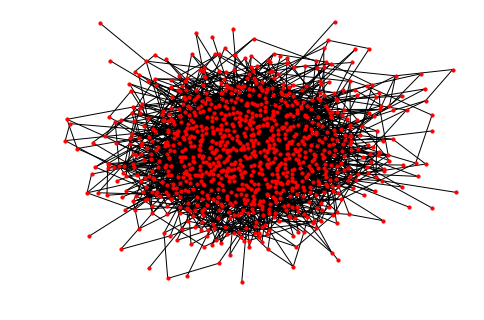

In [5]:
nx.draw(NetA, node_size=10)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


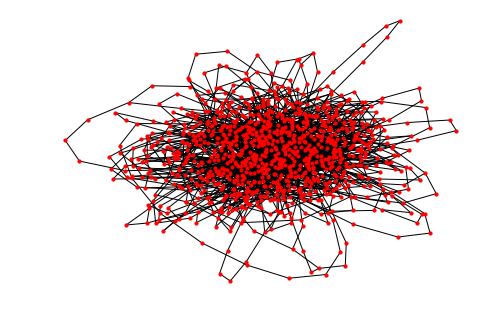

In [6]:
nx.draw(NetB, node_size=10)

## Task 1
Using the two networks provided in (A), calculate the epidemic threshold in the **SIS** dynamics for the homogenous, heterogenous and quenched mean-field approximations for $\mu=0.5$

In [7]:
# Preliminaries

mu = 0.5

## Average degree

### Network A
node_deg = NetA.degree()
node_deg = list(node_deg)
NetA_degree = np.array([x[1] for x in node_deg])
NetA_average_degree   = NetA_degree.mean() # <k_A>
NetA_average_degree_2 = np.mean(np.power(NetA_degree, 2)) # <(k_A)**2>
NetA_max_eigenvalue = np.max(np.real(np.linalg.eig(NetA_matrix)[0]))
print(NetA_max_eigenvalue)

### Network B
node_deg = NetB.degree()
node_deg = list(node_deg)
NetB_degree = np.array([x[1] for x in node_deg])
NetB_average_degree   = NetB_degree.mean() # <k_B>
NetB_average_degree_2 = np.mean(np.power(NetB_degree, 2)) # <(k_B)**2>
NetB_max_eigenvalue = np.max(np.real(np.linalg.eig(NetB_matrix)[0]))
print(NetB_max_eigenvalue)

6.284102805703309
7.5301661877183435


In [8]:
# Homogeneus MF
NetA_lambda_MF = mu/NetA_average_degree
NetB_lambda_MF = mu/NetB_average_degree
print("HOMOGENEOUS MF")
print("Lambda_A =", NetA_lambda_MF)
print("Lambda_B =", NetB_lambda_MF)

HOMOGENEOUS MF
Lambda_A = 0.0971628449280995
Lambda_B = 0.13919821826280623


In [9]:
# Heterogeneous MF
NetA_lambda_HMF = mu*NetA_average_degree/NetA_average_degree_2
NetB_lambda_HMF = mu*NetB_average_degree/NetB_average_degree_2
print("HETEROGENEUOS MF")
print("Lambda_A =", NetA_lambda_HMF)
print("Lambda_B =", NetB_lambda_HMF)

HETEROGENEUOS MF
Lambda_A = 0.08160482080558198
Lambda_B = 0.07587663709336713


In [10]:
# Quenched MF
NetA_lambda_QMF = mu/NetA_max_eigenvalue
NetB_lambda_QMF = mu/NetB_max_eigenvalue
print("QUENCHED MF")
print("Lambda_A =", NetA_lambda_QMF)
print("Lambda_B =", NetB_lambda_QMF)

QUENCHED MF
Lambda_A = 0.07956585298798921
Lambda_B = 0.06639959697244094


## Task 2
Implement the (stochastic) SIS model in the two networks and simulate the entire phase diagram for $\mu=0.5$. Compare the three theoretical thresholds with the numerical results. 

*Suggestion: you need to simulate many (e.g. 100) simulations for each network and compare mean and std with the different analytical approximations.*

$$a_1 = \mu I$$
$$a_2 = \lambda \frac{I (N - I)}{N}$$

In [11]:
def A0(graph, status, m, l):
    """
    graph  = graph of the network
    status = array with status of the nodes (0-> sus, 1->inf)
    m = mu
    l = lambda
    """
    I = status.sum()
    A = [mu*I]
    for index, s in enumerate(status):
        # index of nodes connected to selected node
        connected_nodes = [n for n in graph[index]]
        # number of nodes sonnected to selected node
        N_node = len(connected_nodes)
        # number of 
        I_node = status[connected_nodes].sum()
        a = l*I_node*(N_node-I_Node)/N_node
        A.append(a)
    a0 = np.array(A).sum()
    return a0

In [12]:
# Network A

# 0 -> susceptible
# 1 -> infected
population = np.zeros(NetA_matrix.shape[0])
# infect one people at random
population[np.random.randint(0, population.shape[0])] = 1


In [13]:
np.random.seed(20190410)

'''Gillespie 2.0'''



net = NetB
dim = net.number_of_nodes()
index_i = index_i_B.copy()
index_j = index_j_B.copy()

infects = 50



l = 0.2
n_steps = 3000
N_rep=100

lambdas = np.linspace(0.08,0.09, 10)
test = []





lamba_mean_list=[]
for l in lambdas:
    print("***************lambda =", l)
    iter_matrix=[]
    for repetition in range(N_rep):
    
        state = np.zeros(dim)
        # put Infected in the network
        state[np.random.choice(dim, infects, replace=False)] = 1
        I_number = [infects]
        

        link_matrix = np.zeros((dim,dim))
        for i,j in zip(index_i, index_j):
            if state[i] == state[j]:
                link_matrix[i,j] = 0
                link_matrix[j,i] = 0
            else:
                link_matrix[i,j] = 1
                link_matrix[j,i] = 1

        for steps in range(n_steps):
            n_I = state.sum() # #Infected
            n_S = dim - n_I   # #Susceptible
            n_N = dim
            link_sum = 0.5*link_matrix.sum()
            a1  = mu*n_I
            a2  = l*link_sum#l*n_I*n_S/N_n
            a0  = a1+a2
            p_a1= a1/a0
            #print("P1 =", p_a1, "- P2 =", a2/a0)
            # select the reaction
            # reaction 1
            if np.random.rand() < p_a1:
                # select I at random
                I_index    = np.where(state == 1)[0]
                I_selected = np.random.choice(I_index)
                #print("I_selected =", I_selected)
                # I -> S
                state[I_selected] = 0
                neighbours = np.array([n for n in net.neighbors(I_selected)])
                for Nn in neighbours:
                    if state[I_selected] == state[Nn]:
                        link_matrix[I_selected,Nn] = 0
                        link_matrix[Nn,I_selected] = 0
                    else:
                        link_matrix[I_selected,Nn] = 1
                        link_matrix[Nn,I_selected] = 1

            # reaction 2
            else:
                # select I at random
                I_index = np.where(state == 1)[0]
                #np.random.shuffle(I_index)

                for k in I_index:
                    neighbours = np.array([n for n in net.neighbors(k)])
                    nn_infected = state[neighbours].sum()
                    if nn_infected == len(neighbours): 
                        continue
                    else:
                        np.random.shuffle(neighbours)
                        for NNs in neighbours:
                            if state[NNs] == 0:
                                state[NNs] = 1

                                NNNeighbours = np.array([n for n in net.neighbors(NNs)])
                                for VIC in NNNeighbours:
                                    if state[NNs] == state[VIC]:
                                        link_matrix[NNs,VIC] = 0
                                        link_matrix[VIC,NNs] = 0
                                    else:
                                        link_matrix[NNs,VIC] = 1
                                        link_matrix[VIC,NNs] = 1


                                break
                        break
            I_number.append(state.sum())  
        iter_matrix.append(I_number)
        
    lamba_mean_list.append(np.array(iter_matrix).mean(axis=0))
np.savetxt("I_mean_netB_08_09.gz",np.array(lamba_mean_list))

In [14]:
I_final=[]
lambdas = np.linspace(0.08,0.1, 10)


for i in lamba_mean_list:
    #plt.plot(i, "*")
    #plt.show()
    
    I_temp=i[-200:]
    I_final.append(I_temp.mean())

plt.plot(lambdas,I_final,"*",color="b")

NameError: name 'lamba_mean_list' is not defined

In [ ]:
# '''Gillespie 2.0'''



net = NetA

dim = net.number_of_nodes()
index_i = index_i_A.copy()
index_j = index_j_A.copy()

infects = 50



l = 0.2
n_steps = 3000
N_rep=100

lambdas = np.linspace(0.05,1, 50)
test = []





lamba_mean_list=[]
for l in lambdas:
    print("***************lambda =", l)
    iter_matrix=[]
    for repetition in range(N_rep):
    
        state = np.zeros(dim)
        # put Infected in the network
        state[np.random.choice(dim, infects, replace=False)] = 1
        I_number = [infects]
        

        link_matrix = np.zeros((dim,dim))
        for i,j in zip(index_i, index_j):
            if state[i] == state[j]:
                link_matrix[i,j] = 0
                link_matrix[j,i] = 0
            else:
                link_matrix[i,j] = 1
                link_matrix[j,i] = 1

        for steps in range(n_steps):
            n_I = state.sum() # #Infected
            n_S = dim - n_I   # #Susceptible
            n_N = dim
            link_sum = 0.5*link_matrix.sum()
            a1  = mu*n_I
            a2  = l*link_sum#l*n_I*n_S/N_n
            a0  = a1+a2
            p_a1= a1/a0
            #print("P1 =", p_a1, "- P2 =", a2/a0)
            # select the reaction
            # reaction 1
            if np.random.rand() < p_a1:
                # select I at random
                I_index    = np.where(state == 1)[0]
                I_selected = np.random.choice(I_index)
                #print("I_selected =", I_selected)
                # I -> S
                state[I_selected] = 0
                neighbours = np.array([n for n in net.neighbors(I_selected)])
                for Nn in neighbours:
                    if state[I_selected] == state[Nn]:
                        link_matrix[I_selected,Nn] = 0
                        link_matrix[Nn,I_selected] = 0
                    else:
                        link_matrix[I_selected,Nn] = 1
                        link_matrix[Nn,I_selected] = 1

            # reaction 2
            else:
                # select I at random
                I_index = np.where(state == 1)[0]
                #np.random.shuffle(I_index)

                for k in I_index:
                    neighbours = np.array([n for n in net.neighbors(k)])
                    nn_infected = state[neighbours].sum()
                    if nn_infected == len(neighbours): 
                        continue
                    else:
                        np.random.shuffle(neighbours)
                        for NNs in neighbours:
                            if state[NNs] == 0:
                                state[NNs] = 1

                                NNNeighbours = np.array([n for n in net.neighbors(NNs)])
                                for VIC in NNNeighbours:
                                    if state[NNs] == state[VIC]:
                                        link_matrix[NNs,VIC] = 0
                                        link_matrix[VIC,NNs] = 0
                                    else:
                                        link_matrix[NNs,VIC] = 1
                                        link_matrix[VIC,NNs] = 1


                                break
                        break
            I_number.append(state.sum())  
        iter_matrix.append(I_number)
        
    lamba_mean_list.append(np.array(iter_matrix).mean(axis=0))
np.savetxt("I_mean_netA_0_1.gz",np.array(lamba_mean_list))

Lambda_crit 0.10050051659108422


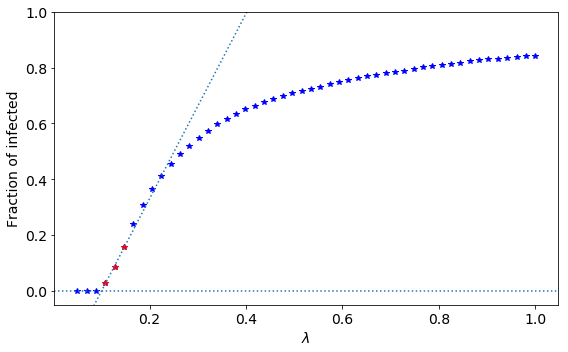

In [93]:
lambda_mean_list=np.loadtxt("/Users/federicob/Documents/Physics_of_data/stat_mecc_compl_sys/Ex_2/I_mean_netA_0_1.gz")
I_final=[]
lambdas = np.linspace(0.05,1, 50)
for i in lambda_mean_list:
    #plt.plot(i, "*")
    #plt.show()
    
    I_temp=i[-500:]
    I_final.append(I_temp.mean())

I_final=np.array(I_final)/1000
Interpolation= np.array([lambdas[3:6],I_final[3:6]])
from scipy import stats
x=Interpolation[0]
y=Interpolation[1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

X=np.linspace(0.05,0.6,50)
Y=slope*X + intercept

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(lambdas,I_final,"*",color="b")
ax.plot(Interpolation[0],Interpolation[1],"*",color="red")
ax.plot(X,Y,":")
ax.axhline(y=0,linestyle=":")
ax.set_ylim(-0.05,1)


ax.set_xlabel("$\lambda$", fontsize=14)
ax.set_ylabel("Fraction of infected", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
fig.savefig("./Net_A_phased.pdf")


Lambda_crit= - intercept/slope
print("Lambda_crit",Lambda_crit)

Lambda_crit 0.0948580089243514


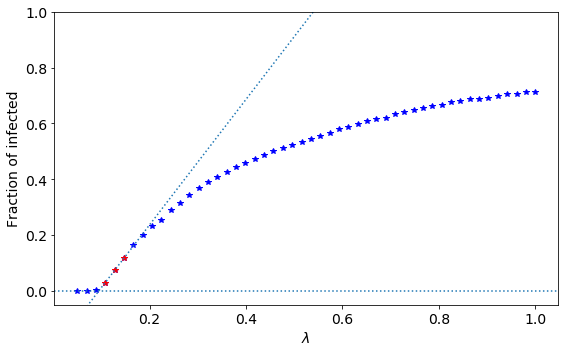

In [94]:
lambda_mean_list=np.loadtxt("/Users/federicob/Documents/Physics_of_data/stat_mecc_compl_sys/Ex_2/I_mean_netB_0_1.gz")
I_final=[]
lambdas = np.linspace(0.05,1, 50)
for i in lambda_mean_list:
    #plt.plot(i, "*")
    #plt.show()
    
    I_temp=i[-500:]
    I_final.append(I_temp.mean())

I_final=np.array(I_final)/1000
Interpolation= np.array([lambdas[3:6],I_final[3:6]])
from scipy import stats
x=Interpolation[0]
y=Interpolation[1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

X=np.linspace(0.05,0.6,50)
Y=slope*X + intercept

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(lambdas,I_final,"*",color="b")
ax.plot(Interpolation[0],Interpolation[1],"*",color="red")
ax.plot(X,Y,":")
ax.axhline(y=0,linestyle=":")
ax.set_ylim(-0.05,1)


ax.set_xlabel("$\lambda$", fontsize=14)
ax.set_ylabel("Fraction of infected", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
fig.savefig("./Net_B_phased.pdf")


Lambda_crit= - intercept/slope
print("Lambda_crit",Lambda_crit)

## Task 3
Characterize the two networks in terms of their connectivity, degree distribution, page-rank distribution, clustering coefficient. Comment the results at the light of point 2 (e.g. how structural properties of the networks and results of the epidemic dynamics are related?)

In [34]:
'''connected component'''
print("number of connected component:")
print("Network A: ",nx.number_connected_components(NetA))
print("Network B: ",nx.number_connected_components(NetB))

number of connected component:
Network A:  1
Network B:  1


In [35]:
'''edge_connectivity'''
print("edge_connectivity")
print("Network A: ",nx.edge_connectivity(NetA))
print("Network B: ",nx.edge_connectivity(NetB))

edge_connectivity
Network A:  1
Network B:  2


In [36]:
'''connectivity'''
link_A=NetA.number_of_edges()
link_B=NetB.number_of_edges()
node_A=NetA.number_of_nodes()
node_B=NetB.number_of_nodes()
conn_A=link_A/(node_A*(node_A-1)/2)
conn_B=link_B/(node_B*(node_B-1)/2)
print("connectivity")
print("Network A: ",conn_A)
print("Network B: ",conn_B)

connectivity
Network A:  0.005151151151151151
Network B:  0.0035955955955955955


Network A: 
Network B: 


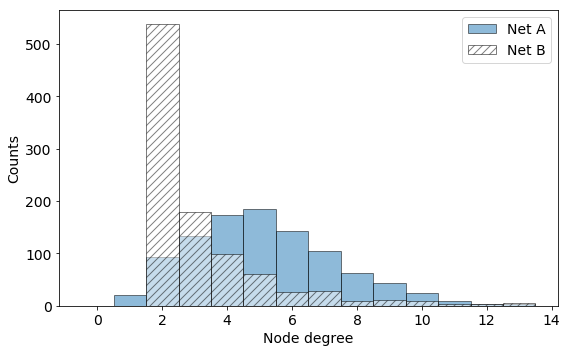

In [90]:
'''node degree'''
print("Network A: ")
node_deg = NetA.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg,bins=[x for x in range(15)], histtype='bar', ec='black', alpha=.5,align="left",label="Net A")
ax.set_xlabel("Node degree", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
#plt.show()

'''node degree'''
print("Network B: ")
node_deg = NetB.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]

# plot the node degree distribution as histogram
#fig, ax = plt.subplots(figsize=(8,5))
ax.hist(deg,bins=[x for x in range(15)], histtype='bar', ec='black', alpha=.5,align="left",hatch="///",color="white",label="Net B")
ax.set_xlabel("Node degree", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.legend(fontsize=14)
fig.tight_layout()
fig.savefig("Node_degree.pdf")
plt.show()

Network A: 
Network B: 


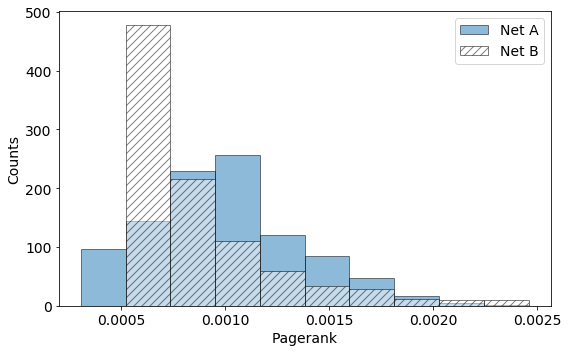

In [89]:
'''pagerank'''
print("Network A: ")
pagerankA=nx.pagerank(NetA).values()

fig, ax = plt.subplots(figsize=(8,5))

_,bins,_=ax.hist(pagerankA, histtype='bar', ec='black', alpha=.5,label="Net A")
ax.set_xlabel("pagerank", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
#plt.show()

print("Network B: ")
pagerankB=nx.pagerank(NetB).values()

#fig, ax = plt.subplots(figsize=(8,5))
ax.hist(pagerankB,bins=bins, histtype='bar', ec='black', alpha=.5,label="Net B",hatch="///",color="white")
ax.set_xlabel("Pagerank", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
plt.legend(fontsize=14)
fig.tight_layout()
fig.savefig("Pagerank.pdf")
plt.show()

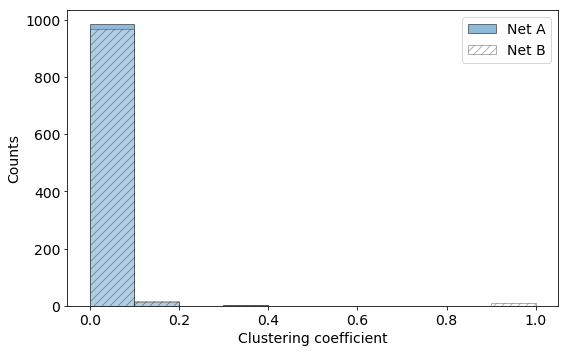

In [95]:
'''clustering coefficient'''
cluster_coeff = nx.clustering(NetA)
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.5,label="Net A")
ax.set_xlabel("Clustering coefficient", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
#plt.show()

cluster_coeff = nx.clustering(NetB)
#fig, ax = plt.subplots(figsize=(8,5))
ax.hist(cluster_coeff.values(), histtype='bar', ec='black', alpha=.3,hatch="///",color="white",label="Net B")
ax.set_ylabel("Counts", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
ax.legend(fontsize=14)
fig.tight_layout()
fig.savefig("Clustering_coeff.pdf")
plt.show()

# Task 5

In [83]:
import pandas as pd
df= pd.read_csv("cases_100locations_first77days.txt",sep=" ")
df


,location_id,days,frac_S,frac_I,frac_R
0,1,0,0.989,0.011,0.000
1,1,1,0.988,0.012,0.000
2,1,2,0.986,0.014,0.000
3,1,3,0.986,0.014,0.000
4,1,4,0.985,0.014,0.001
5,1,5,0.985,0.014,0.001
6,1,6,0.984,0.015,0.001
7,1,7,0.983,0.016,0.001
8,1,8,0.980,0.019,0.001
9,1,9,0.976,0.023,0.001


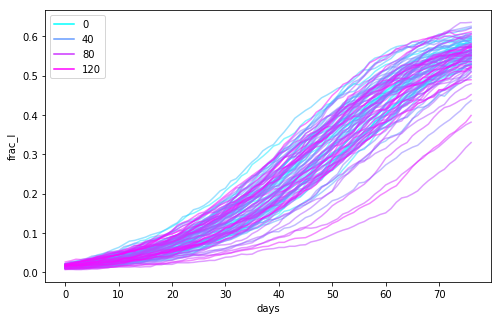

In [84]:
#x -> giorni
#y -> frac_I
#color -> location

import seaborn as sns
color=df["location_id"].tolist()
color=np.array(color)

fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x=df["days"],y=df["frac_I"],hue=color,ax=ax,palette="cool",alpha=.5)


In [85]:
color=df["location_id"].tolist()
color=np.array(color)
type(color[45])

numpy.int64

In [86]:
beta=[]
gamma=[]
for i in range(1,101):
    data=df[df["location_id"]==i]
    
    den_b=(data["frac_S"]*data["frac_I"]).sum()
    num_b=data["frac_S"].iloc[-1]-data["frac_S"].iloc[0]
    b=-num_b/den_b
    beta.append(b)
    
    
    num_g=data["frac_R"].iloc[-1]
    den_g=data["frac_I"].sum()
    g=num_g/den_g
    gamma.append(g)

In [87]:
R0=np.array(beta)/np.array(gamma)

(array([ 3.,  8., 15., 14., 16., 11., 14.,  6.,  4.,  5.,  3.,  0.,  0.,
         1.]),
 array([ 6.52728123,  6.77835167,  7.02942211,  7.28049255,  7.53156299,
         7.78263343,  8.03370387,  8.28477432,  8.53584476,  8.7869152 ,
         9.03798564,  9.28905608,  9.54012652,  9.79119696, 10.0422674 ]),
 <a list of 14 Patch objects>)

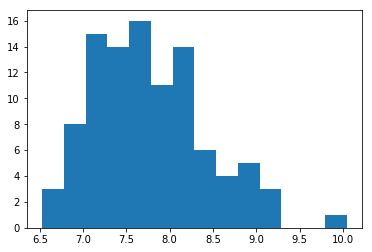

In [88]:
plt.hist(R0,bins=14)

7.771564124968369 0.6655055218325029


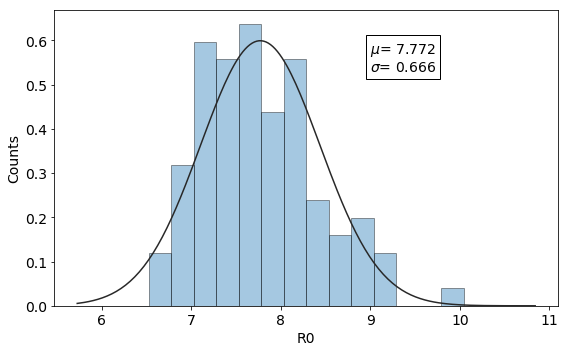

In [93]:
from scipy.stats import norm
mu,sigma=norm.fit(R0)
print(mu,sigma)

legend="$\mu$= {:.3f}\n$\sigma$= {:.3f}".format(mu,sigma)



fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(R0,fit=norm, kde=False,bins=14,ax=ax, norm_hist=True,kde_kws={"color":"black"},hist_kws={"ec":'black'})
ax.set_xlabel("R0", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate(legend, xy=(.65,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)

fig.tight_layout()

0.07507346089734118 0.002604044987051965


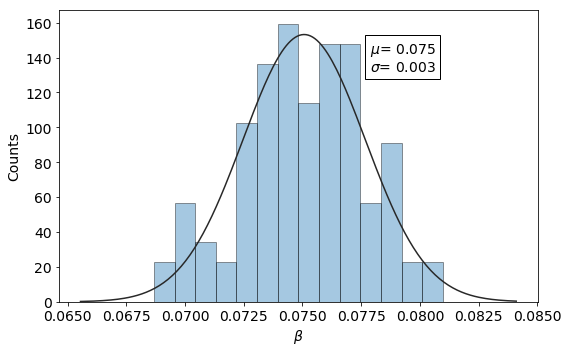

In [92]:
from scipy.stats import norm
beta=np.array(beta)
mu,sigma=norm.fit(beta)
print(mu,sigma)

legend="$\mu$= {:.3f}\n$\sigma$= {:.3f}".format(mu,sigma)



fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(beta,fit=norm, kde=False,bins=14,ax=ax, norm_hist=True,kde_kws={"color":"black"},hist_kws={"ec":'black'})
ax.set_xlabel("$\\beta$", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate(legend, xy=(.65,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)

fig.tight_layout()

0.00971910766594186 0.0007627979098948382


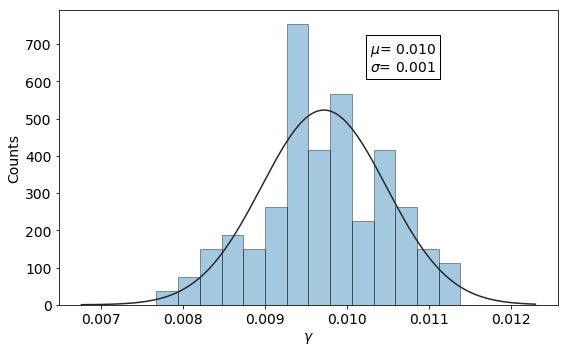

In [91]:
from scipy.stats import norm
gamma=np.array(gamma)
mu,sigma=norm.fit(gamma)
print(mu,sigma)

legend="$\mu$= {:.3f}\n$\sigma$= {:.3f}".format(mu,sigma)



fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(gamma,fit=norm, kde=False,bins=14,ax=ax, norm_hist=True,kde_kws={"color":"black"},hist_kws={"ec":'black'})
ax.set_xlabel("$\gamma$", fontsize=14)
ax.set_ylabel("Counts", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate(legend, xy=(.65,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)

fig.tight_layout()